## *Elements of Machine Learning* 2023
### <font size=3 color='gray'>Alan Reyes-Figueroa</font>

## PCA con imágenes RGB

In [10]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.color import rgb2gray
#from PIL import Image

In [11]:
from warnings import filterwarnings
filterwarnings('ignore')

## 1. Imagen RGB

In [12]:
I = plt.imread('quetzal.png')
I.shape

(540, 500, 4)

In [14]:
Igray = rgb2gray(I)
Igray.shape

ValueError: the input array must have size 3 along `channel_axis`, got (540, 500, 4)

NameError: name 'Igray' is not defined

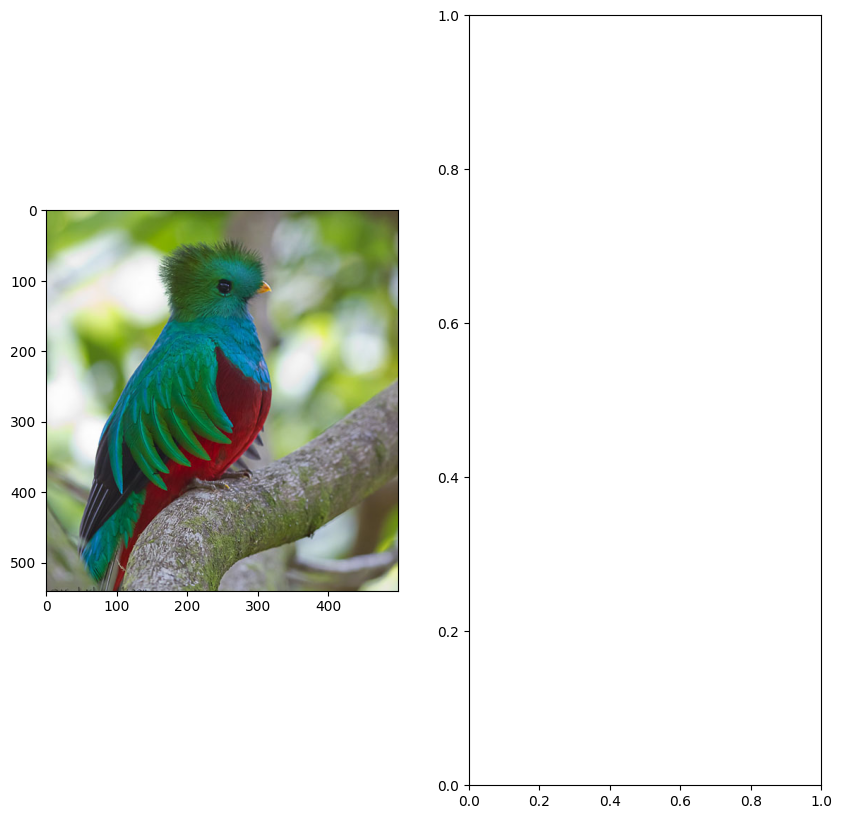

In [15]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(I)
plt.subplot(1,2,2)
plt.imshow(Igray, cmap=plt.cm.gray)
plt.show()

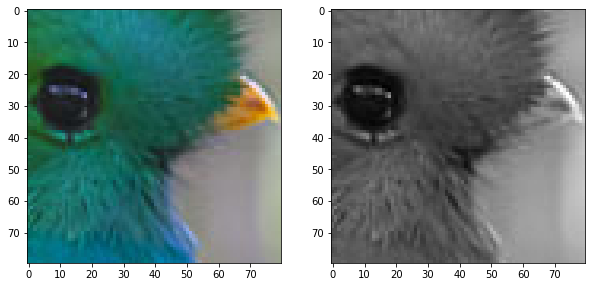

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(I[80:160, 240:320, :])
plt.subplot(1,2,2)
plt.imshow(Igray[80:160, 240:320], cmap=plt.cm.gray)
plt.show()

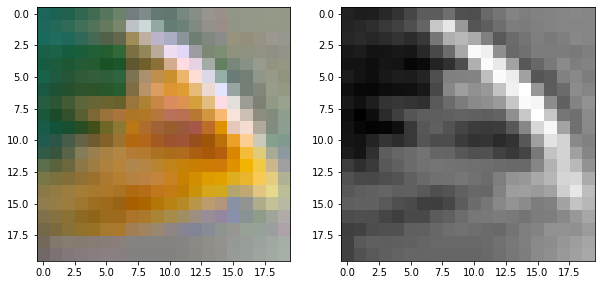

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(I[100:120, 300:320, :])
plt.subplot(1,2,2)
plt.imshow(Igray[100:120, 300:320], cmap=plt.cm.gray)
plt.show()

In [ ]:
print((255*I[80:90, 300:310, 0]).astype(np.uint8))

[[ 36  41  53  70  89 102 110 132 132 133]
 [ 39  47  56  69  84  94  96 108 115 123]
 [ 49  54  55  60  74  87  94 100 109 122]
 [ 48  49  45  49  64  85  98 118 123 127]
 [ 31  32  34  44  65  90 105 108 112 118]
 [ 30  31  38  50  67  85  99 121 126 133]
 [ 33  34  34  40  61  93 114 130 125 124]
 [ 22  27  38  56  73  83  89  87  96 109]
 [ 28  29  32  37  46  54  59  86 103 124]
 [ 31  29  25  26  39  60  76 114 126 140]]


In [ ]:
print((255*I[80:90, 300:310, 1]).astype(np.uint8))

[[ 80  85  95 108 118 125 128 142 142 140]
 [ 87  95 101 108 115 118 117 119 125 133]
 [103 108 104 103 108 114 114 111 120 132]
 [108 107  99  94 101 113 120 131 134 138]
 [ 95  94  92  93 104 118 129 121 125 129]
 [ 96  95  96  99 106 116 123 134 139 144]
 [103 102  98  95 105 126 144 153 145 137]
 [ 92  95 101 111 117 119 119 108 113 120]
 [100  98  97  94  93  92  91 106 118 133]
 [104 101  92  85  87  98 110 131 139 146]]


In [ ]:
print((255*I[80:90, 300:310, 2]).astype(np.uint8))

[[ 57  62  73  87 100 109 114 134 134 133]
 [ 63  71  78  87  97 102 102 111 117 125]
 [ 79  84  82  83  91  99 102 103 112 124]
 [ 82  82  75  73  83  98 107 122 126 130]
 [ 69  69  68  72  86 104 116 112 116 121]
 [ 69  69  72  78  88 101 110 125 130 136]
 [ 77  77  74  74  90 115 134 143 136 130]
 [ 68  72  80  92 102 107 109  99 105 114]
 [ 78  77  77  75  77  79  80  97 111 128]
 [ 85  81  74  67  71  85  96 123 132 142]]


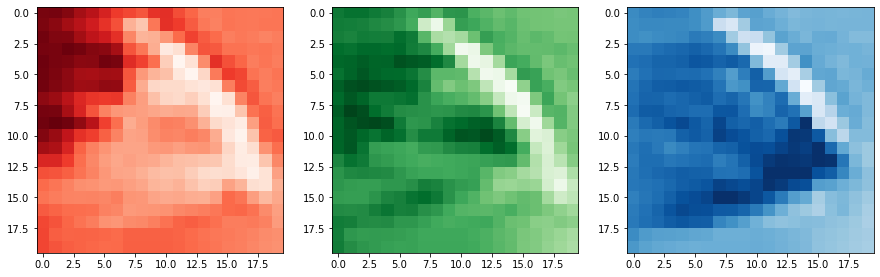

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(I[100:120, 300:320, 0], cmap=plt.cm.Reds_r)
plt.subplot(1,3,2)
plt.imshow(I[100:120, 300:320, 1], cmap=plt.cm.Greens_r)
plt.subplot(1,3,3)
plt.imshow(I[100:120, 300:320, 2], cmap=plt.cm.Blues_r)
plt.show()

In [ ]:
def imageRGB2vectorblocks(I, block_size):
    '''
    Función que convierte una imagen RGB a un stack de bloques vectorizados.
    Inputs:   I = imagen grayscale de tamaño o shape (h, w, 3).
              block_size = entero, que representa el tamaño de los bloques cuadrados,
                           se trabajarán bloques de tamaño o shape (block_size, block_size, 3).
    Outputs:  stack = stack de bloques, el formato del stack es un numpy array de tamaño (N, b),
                      donde N es el número de bloques resultantes y b = block_size * block_size * 3.
    '''
    (h, w, ch) = I.shape[:3]
    stack = []
    
    for i in range(0, h//block_size):
        for j in range(0, w//block_size):
            block = I[block_size*i:block_size*(i+1), block_size*j:block_size*(j+1), :].ravel()
            stack.append(block)
    stack = np.array(stack)
    return stack

In [ ]:
def vectorblocks2imageRGB(stack, Ishape, block_size):
    '''
    Función que convierte una stack de bloques vectorizados a una imagen en escala de grises.
    Inputs:   stack  = stack de bloques, el formato del stack es un numpy array de tamaño (N, b),
                       donde N es el número de bloques resultantes y b = block_size * block_size * 3.
              Ishape = tamaño de la imagen esperada de salida (h, w, 3).
              block_size = entero, que representa el tamaño de los bloques cuadrados,
                           en el stack (block_size, block_size).
    Outputs:  J = imagen reconstruida en escala de grises, como numpy array de tamaño (h, w).
    '''

    (h, w, ch) = Ishape
    J = np.zeros((h, w, ch))
    
    for i in range(0, stack.shape[0]):
        r = i * block_size // w
        c = i - r*(w // block_size)
        block = stack[i,:].reshape(block_size, block_size, ch)
        J[block_size*r:block_size*r+block_size, block_size*c:block_size*c+block_size, :] = block
    return J

In [ ]:
sh = 10
stack = imageRGB2vectorblocks(I, sh)
stack.shape

(2700, 400)

In [ ]:
# Centramos los datos
mu = stack.mean(axis=0)
std = stack.std(axis=0)

Xc = (stack - mu) / std

In [16]:
U, S, V = np.linalg.svd(stack)
print(U.shape, S.shape, V.shape)

(2700, 2700) (400,) (400, 400)


In [17]:
S = np.diag(S)
S.shape

(400, 400)

In [18]:
# probando con los siguientes números de componentes principales
ks = [1,2,3,4,5,10,15,20,30,40,50,60,70,80,90,100]

Ishape = I.shape[:3]
approx = []

for k in ks:
    appk = U[:,:k] @ S[:k,:k] @ V[:k,:] 
    J = vectorblocks2imageRGB(appk, Ishape, sh)
    approx.append(J)

In [19]:
J = vectorblocks2imageRGB(stack, Ishape, sh)
J.shape

(540, 500, 4)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


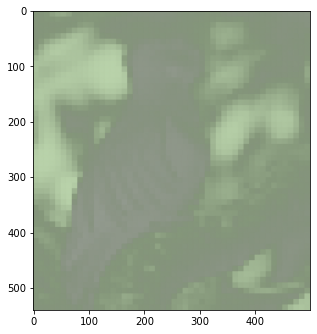

In [20]:
plt.figure(figsize=(5,5.5))
plt.imshow(approx[0])
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

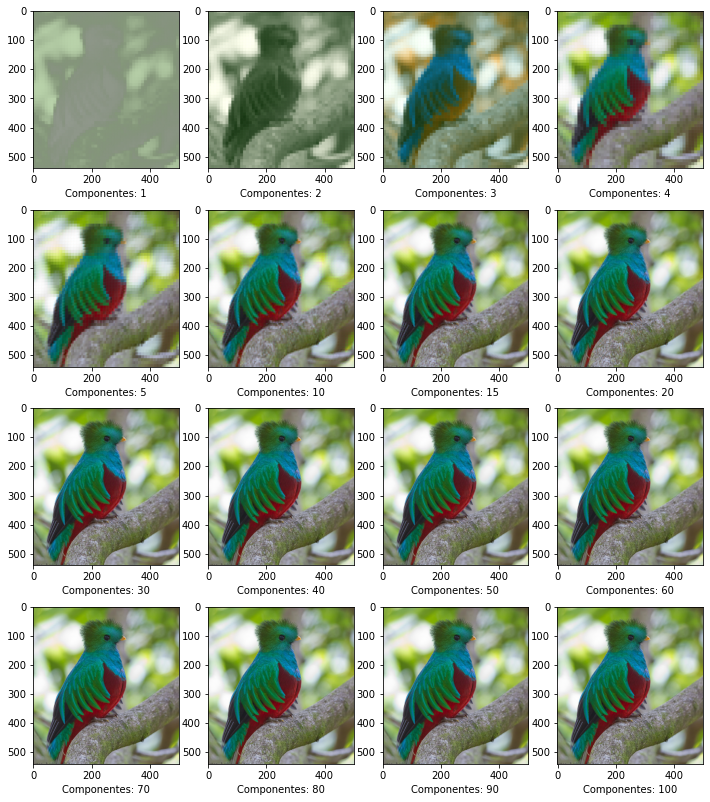

In [21]:
plt.figure(figsize=(12,14))
for i in range(0, 4):
    for j in range(0, 4):
        plt.subplot(4,4,4*i+j+1)
        plt.imshow(approx[4*i+j])
        plt.xlabel('Componentes: {}'.format(ks[4*i+j]))
plt.show()

### Cálculo del Error

In [22]:
Cov = (stack.T) @ stack

In [23]:
eigs, _ = np.linalg.eig(Cov)

In [25]:
explained_variance = eigs / eigs.sum()

In [26]:
np.round(explained_variance[:20], 4)

array([9.392e-01+0.j, 4.140e-02+0.j, 8.800e-03+0.j, 4.400e-03+0.j,
       1.400e-03+0.j, 9.000e-04+0.j, 4.000e-04+0.j, 3.000e-04+0.j,
       2.000e-04+0.j, 2.000e-04+0.j, 2.000e-04+0.j, 2.000e-04+0.j,
       1.000e-04+0.j, 1.000e-04+0.j, 1.000e-04+0.j, 1.000e-04+0.j,
       1.000e-04+0.j, 1.000e-04+0.j, 1.000e-04+0.j, 1.000e-04+0.j],
      dtype=complex64)

In [27]:
explained_accumulative = explained_variance.cumsum()

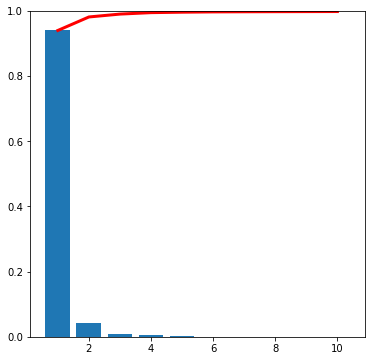

In [28]:
k = 10
plt.figure(figsize=(6,6))
plt.bar(np.arange(1,1+k), explained_variance[:k])
plt.plot(np.arange(1,1+k), explained_accumulative[:k], 'r-', lw=3)
plt.ylim([0,1])
plt.show()